
* **Part 1**: Watch Prof. Abu-Mostafa’s Lectures [4] and explain what margin and non-margin support vectors are.

*  **Part 2**: Create a binary classification problem using sklearn.datasets.make moons. Build a SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on the model performance

## Part 1: Watch Prof. Abu-Mostafa’s Lectures [4] and explain what margin and non-margin support vectors are.

## Margin support vectors
image.png


The support vectors with 0 < α* < C are called the free support vectors,
which are guaranteed to be on the boundary of the fat-hyperplane and hence
also called margin support vectors.

## Non Margin sector
image.png

The support vectors with α* = C, are called the non-margin support vectors (also called bounded support vectors). They can be on the fat boundary, slightly violating the boundary but still correctly predicted, or seriously violating the boundary and erroneously predicted.

In Prof. Abu-Mostafa's lectures on Support Vector Machines (SVM), the concept of the "margin" is described as the space between the nearest data points of different classes and the decision boundary or hyperplane created by the SVM. The primary objective of SVM is to find the hyperplane that maximizes this margin. A larger margin is desired because it results in a more robust classifier with lower generalization errors.
Support vectors hold a critical role in SVMs, as emphasized by Prof. Abu-Mostafa. They are the data points that significantly influence the position and orientation of the hyperplane. These support vectors are called "support" because their removal would lead to a substantial alteration in the decision boundary. Essentially, support vectors are the instances that pose the greatest challenge in terms of classification and have a direct impact on defining the classifier's margin.
There are two types of support vectors in SVMs:

1. Margin Support Vectors: These data points are precisely located on the margin boundaries. They sit at the exact distance from the hyperplane, which is equal to the margin's width. These points are situated on the edges of the boundary lines drawn at a distance equal to the margin from the hyperplane.

2. Non-margin Support Vectors: In some variations of SVMs, particularly those that allow for a "soft margin" (which permits some misclassifications or points to be within the margin to enhance generalization), non-margin support vectors are data points located within the margin space but not correctly classified. They can be found between the margin boundary and the hyperplane or even on the wrong side of the hyperplane. In soft margin SVMs, these points affect the loss term in the optimization objective and still play a role in determining the decision boundary's position, even though they are not directly on the margin boundary.

Non-margin support vectors are particularly relevant in situations where the data is not linearly separable, and allowing some errors can help the SVM find a better generalizing model. The "C" parameter in SVM tuning controls the balance between the margin's size and the penalty assigned to these misclassifications, influencing the SVM's overall performance.

In summary, in Prof. Abu-Mostafa's SVM lectures, "margin" signifies the space between data points and the decision boundary, while support vectors are critical data points that "support" the hyperplane. Margin support vectors are precisely on the margin boundary, and non-margin support vectors, in soft margin SVMs, are within the margin space and impact the model's accuracy by influencing the decision boundary. The parameter "C" controls the trade-off between margin size and error penalties.




## Part 2: Create a binary classification problem using sklearn.datasets.make moons. Build a SVM classifier model and investigate the effect of hyper-parameters C, γ, and kernels on the model performance

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.datasets import make_moons
from mlxtend.plotting import plot_decision_regions

In [ ]:
X, y = make_moons(n_samples=200, noise=0.3, random_state=42)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
scaler=StandardScaler().fit(X_train)

X_train_scaled=scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

# We begin our assignment here by adding only one hyperparameter and making observations at the end of each model.

In [ ]:
model=SVC(kernel="sigmoid")
model.fit(X_train_scaled,y_train)

SVC(kernel='sigmoid')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.7714285714285715

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.7666666666666667

<Axes: >

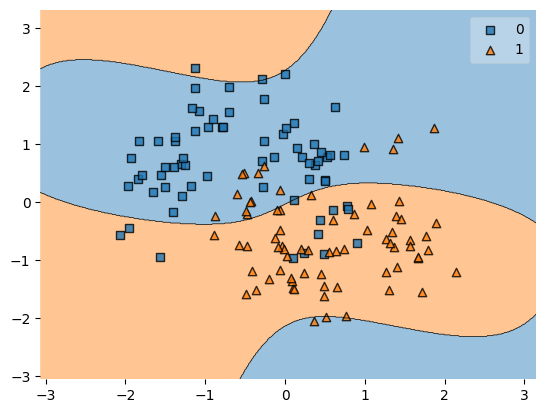

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

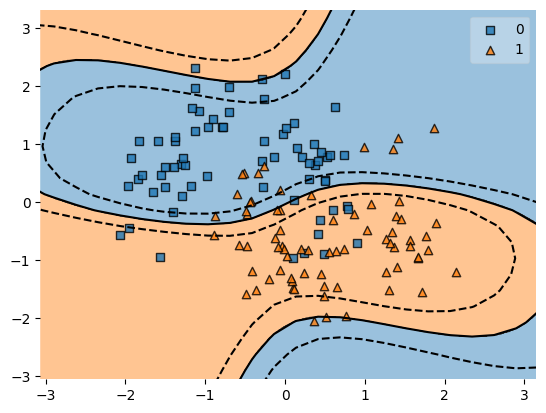

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# Without adding additional hyperparamters, the accuracy score for the first SVM model with "kernel: sigmoid" is a little more than 77% for the train set and a bit less than 77% for the test set.

# Since this is our first SVM model without adding additional other hyperparameters, in the examples below, we will test the same kernel hyperparameter and also modify "gamma" and "C" to observe any changes in accuracy in our model performaance.

In [ ]:
model=SVC(kernel="sigmoid",C=2,gamma=0.5) #adding additional hyperparamters
model.fit(X_train_scaled,y_train)

SVC(C=2, gamma=0.5, kernel='sigmoid')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.7357142857142858

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.7333333333333333

<Axes: >

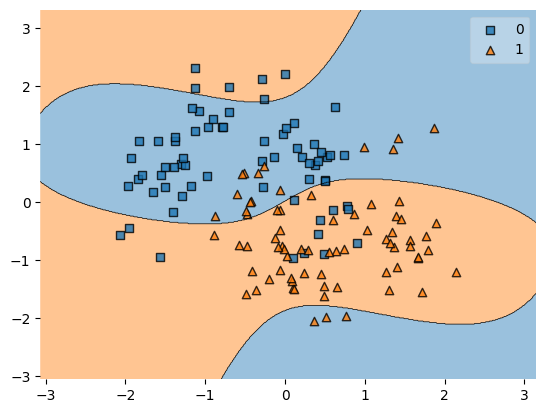

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

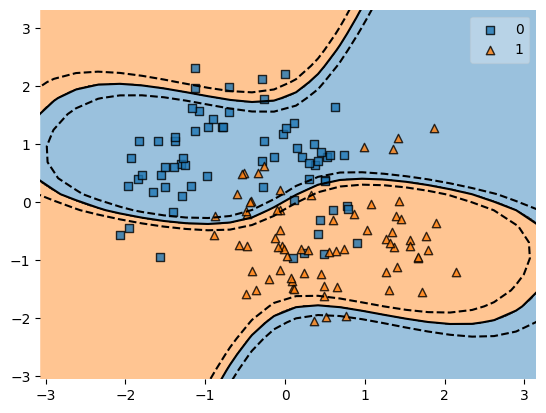

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# It seems after adding additional hyperparameters of "C=2, gamma=0.5", the training accuracy dropped  from around 77% on our first model to around 73% (almost 74%) on this model. A similar observation can be found when looking at the test accuracy where accuracy dropped from around 77% to 73%, again.

# For our next model, we will remove "gamma" as a hyperparamter, increase the "C" to 10, and changing the kernel to "linear" and make our new observations to understand how our hyperparameters are affecting our SVM model.  

In [ ]:
model=SVC(kernel="linear",C=10)
model.fit(X_train_scaled,y_train)

SVC(C=10, kernel='linear')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)


0.8142857142857143

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.8333333333333334

<Axes: >

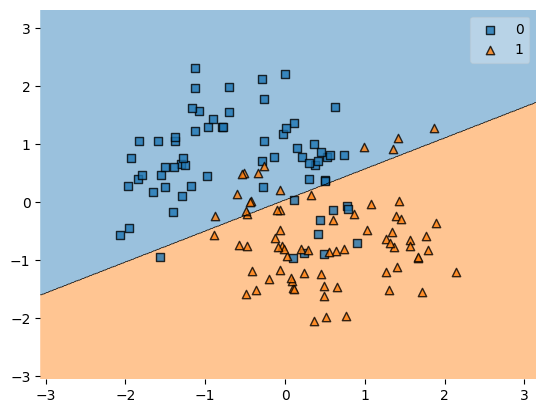

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

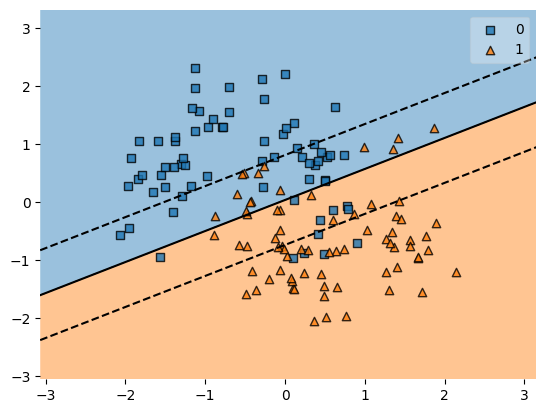

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# We notice now a significant improvement in our model by using hyperparamters "kernel=linear, C=10". The test accuracy has gone from 74% on our previous run to around 81%, now. Similar improvements can be observed from our test accuracy going from 73% to more than 83%! From this, we can suggest that increasing the "C" hyperparameter improves our SVM model.

# For our next run, we will remove all hyperparamters and observe any changes to our SVM model performance.

In [ ]:
model=SVC()
model.fit(X_train_scaled,y_train)

SVC()

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8785714285714286

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.9

<Axes: >

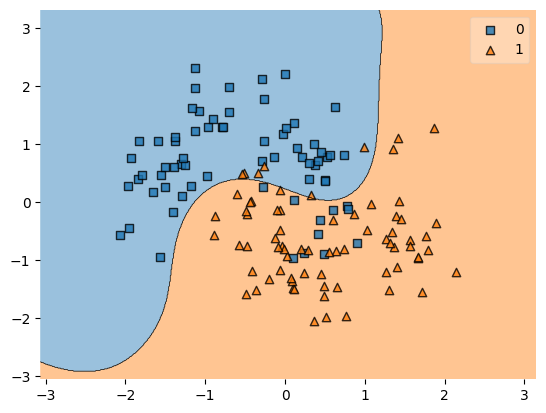

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

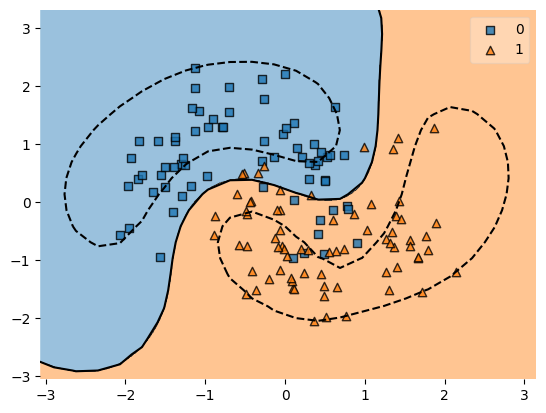

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# Removing all hyperparameters results in futher improvement in our model performance. We now show nearly an 88% accuracy for our train set and exactly a 90% acccuracy for our test set.

# To continue our model observations, we will include other hyperparameters and increase "C" to 50 lower gamma to 0.1.

In [ ]:
model=SVC(C=50,gamma=0.1)
model.fit(X_train_scaled,y_train)

SVC(C=50, gamma=0.1)

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8857142857142857

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test, y_pred_test)

0.85

<Axes: >

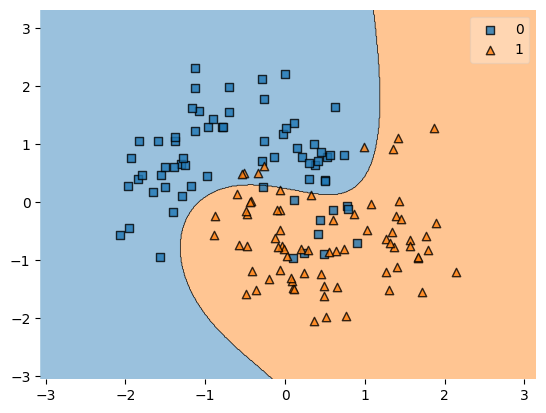

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

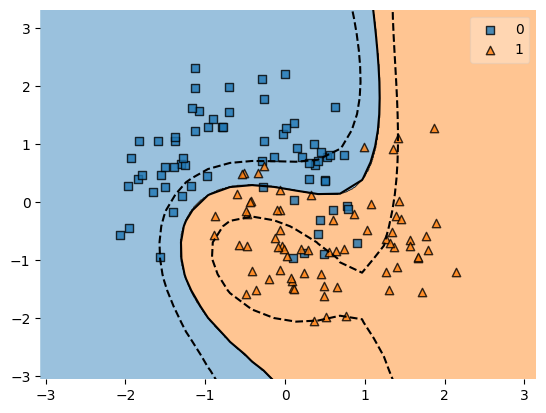

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# The accuracy results here are very similar to our last run. The train accuracy score for hyperparamters "C=50, gamma=0.1" results in over 88% which nearly matches our last run. The test accuracy however dropped from 90% to 85%. While this model did not have a higher accuracy than our last, we still can test other hyperparameters.

# Now we will change our pattern by adding 3 hyperparameters. We include "kernel = 'linear' ", "gamma = 50", and "C=1". Notice the results below:


In [ ]:
model=SVC(kernel="linear",C=1,gamma=50)
model.fit(X_train_scaled,y_train)

SVC(C=1, gamma=50, kernel='linear')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8142857142857143

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred_test)

0.8333333333333334

<Axes: >

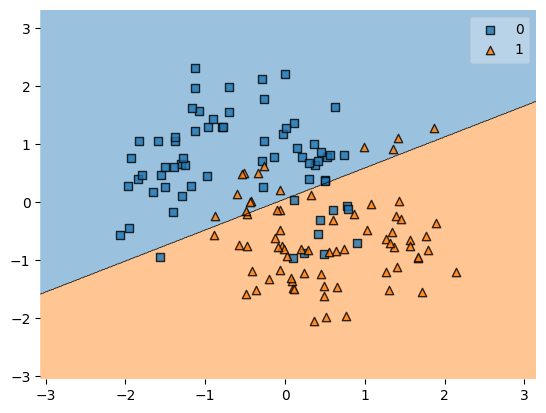

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

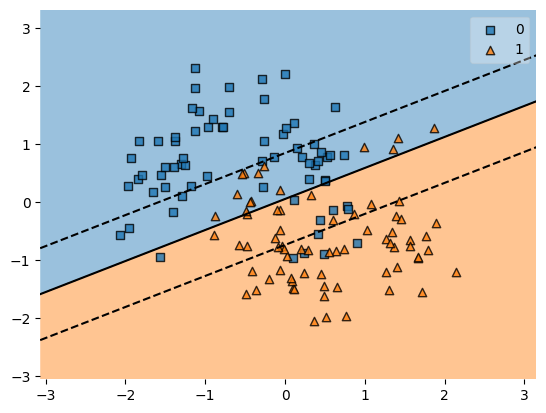

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# We can observe here that our SVM model did not improve at all. The train accuracy with our 3 hyperparameters dropped to a little over 81%, and our test accuracy dropped to 83%.

#We will now introduce a new hyperparamter we have not used yet, "kernel: 'poly'", and keep the same "C=1".

#We will note our observations below:

In [ ]:
model.support_vectors_

array([[ 0.4950882 ,  0.3898544 ],
       [ 0.74374608,  0.80481913],
       [ 0.36885156,  1.00946576],
       [ 0.60045967, -0.12527377],
       [ 0.40981445, -0.54470196],
       [ 0.90561966, -0.69732287],
       [ 0.29555838,  0.39182121],
       [ 0.37169401,  0.64942633],
       [-1.29679772,  0.11176666],
       [ 0.52276045,  0.77578117],
       [-1.95164248, -0.44255206],
       [ 0.77754564, -0.06955646],
       [-0.27292852,  0.25962792],
       [ 0.41478617,  0.70208672],
       [ 0.21439959,  0.78451054],
       [ 0.48436341, -0.887684  ],
       [ 0.55812279,  0.81096539],
       [ 0.23421637, -0.8686779 ],
       [ 0.44009415, -0.29762391],
       [-1.57179854, -0.9514423 ],
       [-1.40528799, -0.16572561],
       [ 0.78779498, -0.1174212 ],
       [ 0.11814322,  0.03035523],
       [ 0.44519992,  0.87304179],
       [-2.06893524, -0.56492846],
       [ 0.29934987,  0.67879771],
       [ 0.50101638,  0.36760601],
       [ 0.10371038, -0.96214731],
       [ 0.14837057,

In [ ]:
model = SVC(kernel="poly", C=1)
# You can specify the degree of the polynomial by setting the 'degree' parameter (e.g., degree=3)
model.fit(X_train_scaled, y_train)


SVC(C=1, kernel='poly')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.8571428571428571

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred_test)

0.9166666666666666

<Axes: >

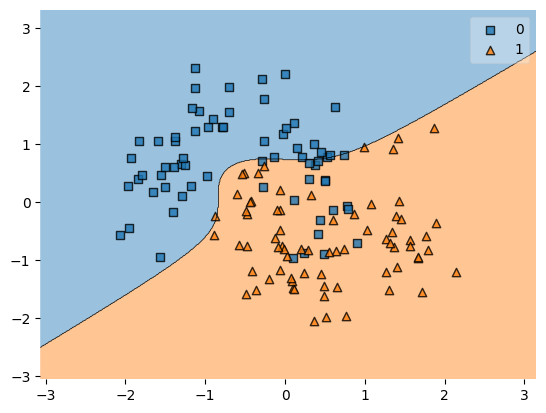

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

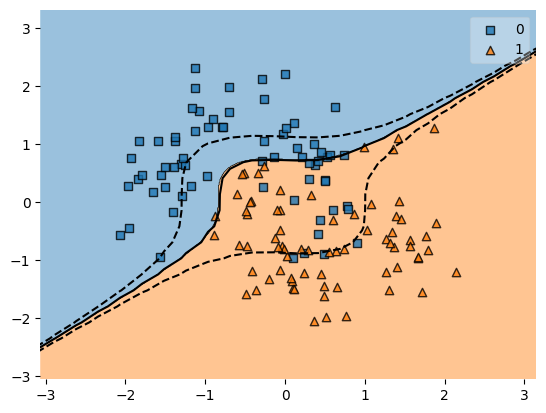

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# We finally see an improvement! While our train accuracy is now around 85% (nearly 86%), our test accuracy shows an all time high at 91%. We can conclude that using these hyperparameters can result in the highest test accuracy we have seen yet for our SVM model.

# Compared to using no additional hyperparamters, using the hyperparamters "kernel: 'poly'" and "C=1" ensures the highest test accuracy for this SVM model.

# For one last test, we will change the hyperparameters to "kernel=sigmoid", "C=1", and "gamma=60", and note any observations below:

In [ ]:
model = SVC(kernel="sigmoid", C=1, gamma=60)
# You can adjust the 'gamma' and 'C' parameters as needed
model.fit(X_train_scaled, y_train)

SVC(C=1, gamma=60, kernel='sigmoid')

In [ ]:
y_pred_train=model.predict(X_train_scaled)
accuracy_score(y_train, y_pred_train)

0.7214285714285714

In [ ]:
y_pred_test=model.predict(X_test_scaled)
accuracy_score(y_test,y_pred_test)

0.6833333333333333

<Axes: >

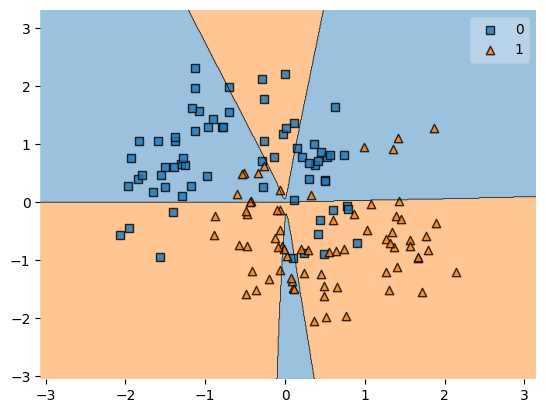

In [ ]:
plot_decision_regions(X_train_scaled, y_train, clf = model)

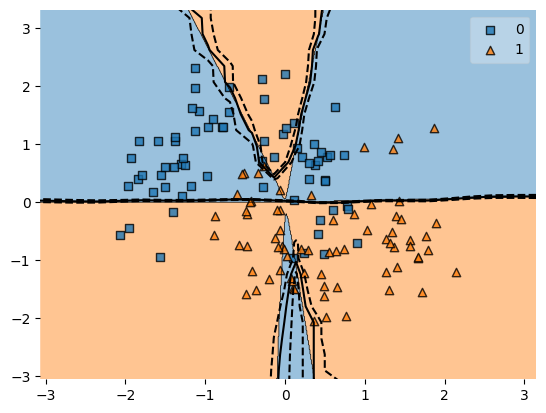

In [ ]:
ax = plt.gca()
xx = np.linspace(-4, 4, 30)
yy = np.linspace(-4, 4, 30)

YY, XX = np.meshgrid(yy, xx)

xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = model.decision_function(xy).reshape(XX.shape)

ax.contour(XX, YY, Z, colors = 'k', levels = [-1, 0, 1], linestyles=["--", "-", "--"])

plot_decision_regions(X_train_scaled, y_train, clf = model);

# On our last run, we see the worst accuracy scores for our SVM model. The train accuracy dropped to 72%, and the test accuracy dropped to 68%. We can  definitively conclude that using hyperparameters "kernel= 'sigmoid'", "C=1", and "gamma=60" does not work well for our SVM model.

# In conclusion, the two highest performing SVM models for our dataset include using:
# (1) no hyperparameters which showed a train accuracy of nearly 88% and exactly 90% acccuracy for our test set, and
#(2) using the hyperparameters of "kernel: 'poly'"and "C=1" which showed a train accuracy is around 85% (nearly 86%), and a test accuracy showed an all time high of 91%.

#We can conclude that using these hyperparameters will result in the highest test accuracy we have for our SVM model thus ending our observations for this assignment.
